In [84]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [4]:
Image_Size = 256
Batch_size = 32

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(dataset)

68

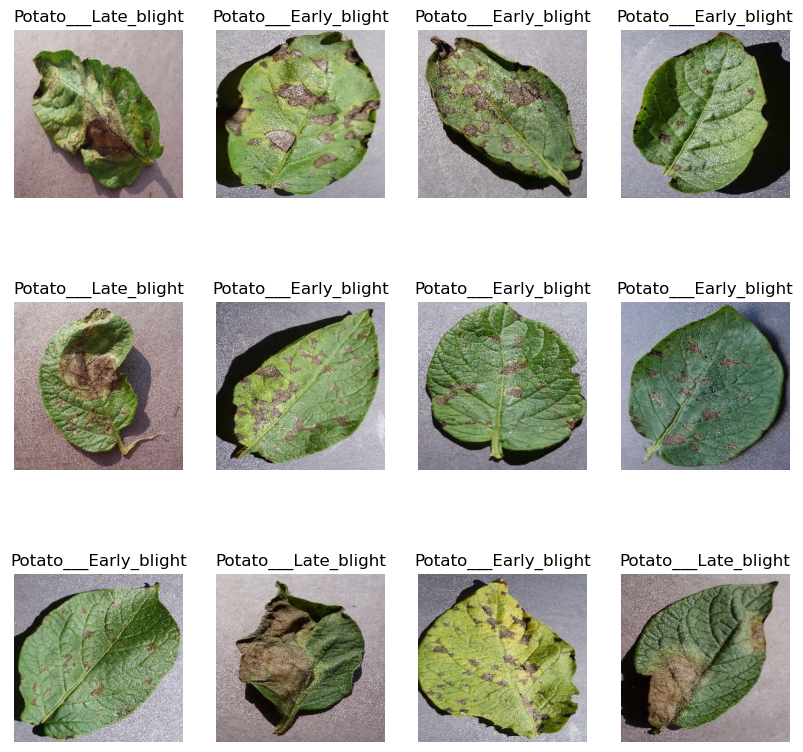

In [57]:
plt.figure(figsize=(10,10))
for image_batch,label in dataset.take(1).as_numpy_iterator():
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].astype('uint8'))
        plt.axis("off")
        plt.title(class_names[int(label[i])])

In [58]:
len(dataset)

68

In [59]:
train_size = len(dataset)*0.8
train_size

54.400000000000006

In [60]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [62]:
len(train_ds)

54

In [63]:
len(test_ds)

14

In [64]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [65]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [67]:
len(val_ds)

6

In [66]:
len(dataset) == len(val_ds) + len(train_ds) + len(test_ds)

True

In [68]:
import math

In [77]:
def get_data_Partitions(ds, train_split=0.8,test_split=0.1,val_split=0.1,shuffle = True, shuffle_size=10000):

    if shuffle == True:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = math.floor(len(ds)*train_split)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_size = math.floor(len(ds)*val_split)
    val_ds = test_ds.take(val_size)
    test_ds = test_ds.skip(val_size)
    
    

    return train_ds, test_ds,val_ds

In [78]:
train_ds, test_ds,val_ds = get_data_Partitions(dataset)

In [79]:
len(dataset) == len(train_ds)+ len(test_ds)+len(val_ds)

True

In [80]:
len(train_ds)

54

In [81]:
len(test_ds)

8

In [82]:
len(val_ds)

6

In [83]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
tf.keras.Sequential([
    layers.experimental.preprocessing.
])